In [2]:
from sklearn.datasets import load_boston
import pandas as pd

In [3]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [4]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [7]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt

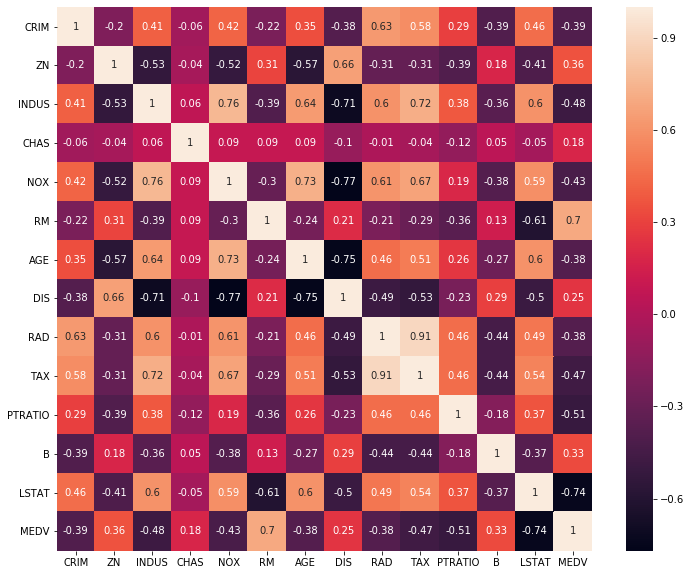

In [9]:
correlation_matrix = data.corr().round(2)
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

In [10]:
import pandas_profiling
data.profile_report()

Выделим несколько величин. Во-первых, **очевидно TAX и RAD.** Эти величины выделяет сам profile в силу высокой корреляции между ними. TAX - налоги, RAD - индекс доступности 
радиальных скоростных дорог. Непонятно, почему у них такая высокая степень корреляции. Возможно кадастровая стоимость земли зависит от доступности дорого,  
и налог на землю является доминирующим. Кстати возможно это так. В пользу данного рассуждения говорит, тот факт, что индекс доступности дорог имеет отрицательную корреляцию
с медианной ценой на жилье. Вдоль дорог ставят не жилую, а коммерческую недвижимость, там жить не хотят. В любом случае мы можем **отбросить RAD** и **оставить только TAX.**  
У него и корреляция побольше с целевым показателем, он не ранговый и с более понятным влиянием.

In [11]:
data = data.drop(['RAD'], axis=1)
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [ ]:
Далее, в параметре "AGE" есть аномально большое количество собственников жилья возрастом 100 лет. Есть подозрение, что   
это аналог параметра NaN. Собственнкам жилья с неустановленным возрастом, устанавливают возраст 100.  
Удалим их, это 8,5% всех данных и посмотрим корреляцию.

In [14]:
data = data[data['AGE'] != 100]
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

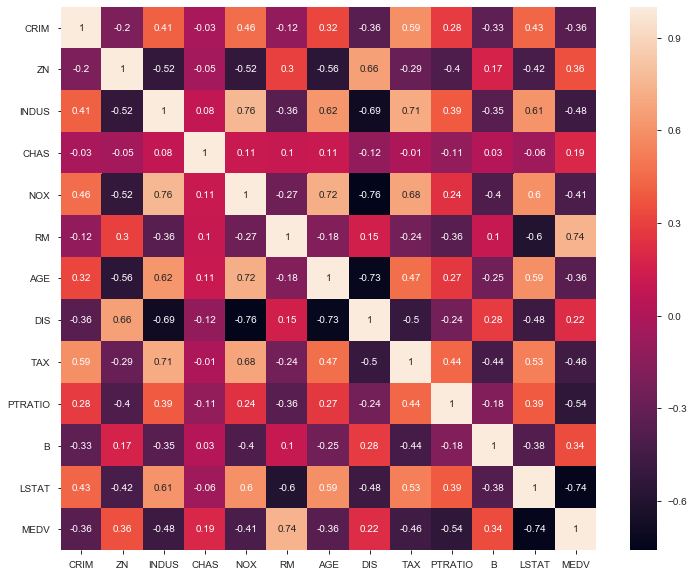

In [15]:
correlation_matrix = data.corr().round(2)
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

В таком виде **AGE** имеет сильную корреляцию с **LSTAT** (показатель бедности населения). Который в свою очередь очень сильно коррелирует с ценой квартиры.  
При этом влияние **LSTAT** на цену дома легче обосновать. Убираем **AGE**.

In [16]:
data = data.drop(['AGE'], axis=1)
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM     DIS  TAX  PTRATIO       B  \
0  0.00632  18.0   2.31     0  0.538  6.575  4.0900  296     15.3  396.90   
1  0.02731   0.0   7.07     0  0.469  6.421  4.9671  242     17.8  396.90   
2  0.02729   0.0   7.07     0  0.469  7.185  4.9671  242     17.8  392.83   
3  0.03237   0.0   2.18     0  0.458  6.998  6.0622  222     18.7  394.63   
4  0.06905   0.0   2.18     0  0.458  7.147  6.0622  222     18.7  396.90   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2

Далее **CHAS**. Это дихотомический параметр как то связанный с близостью к воде. Всего 7% данного признака имеет значение 1.  
Хочется отбросить все значения с 1 как выброс, тогда можно в принципе в дальнейшем не учитывать **CHAS**,  
но лучше сначала посмотрим влияние данного параметра на графиках. Возможно удасться выделить отдельные классы данных.

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

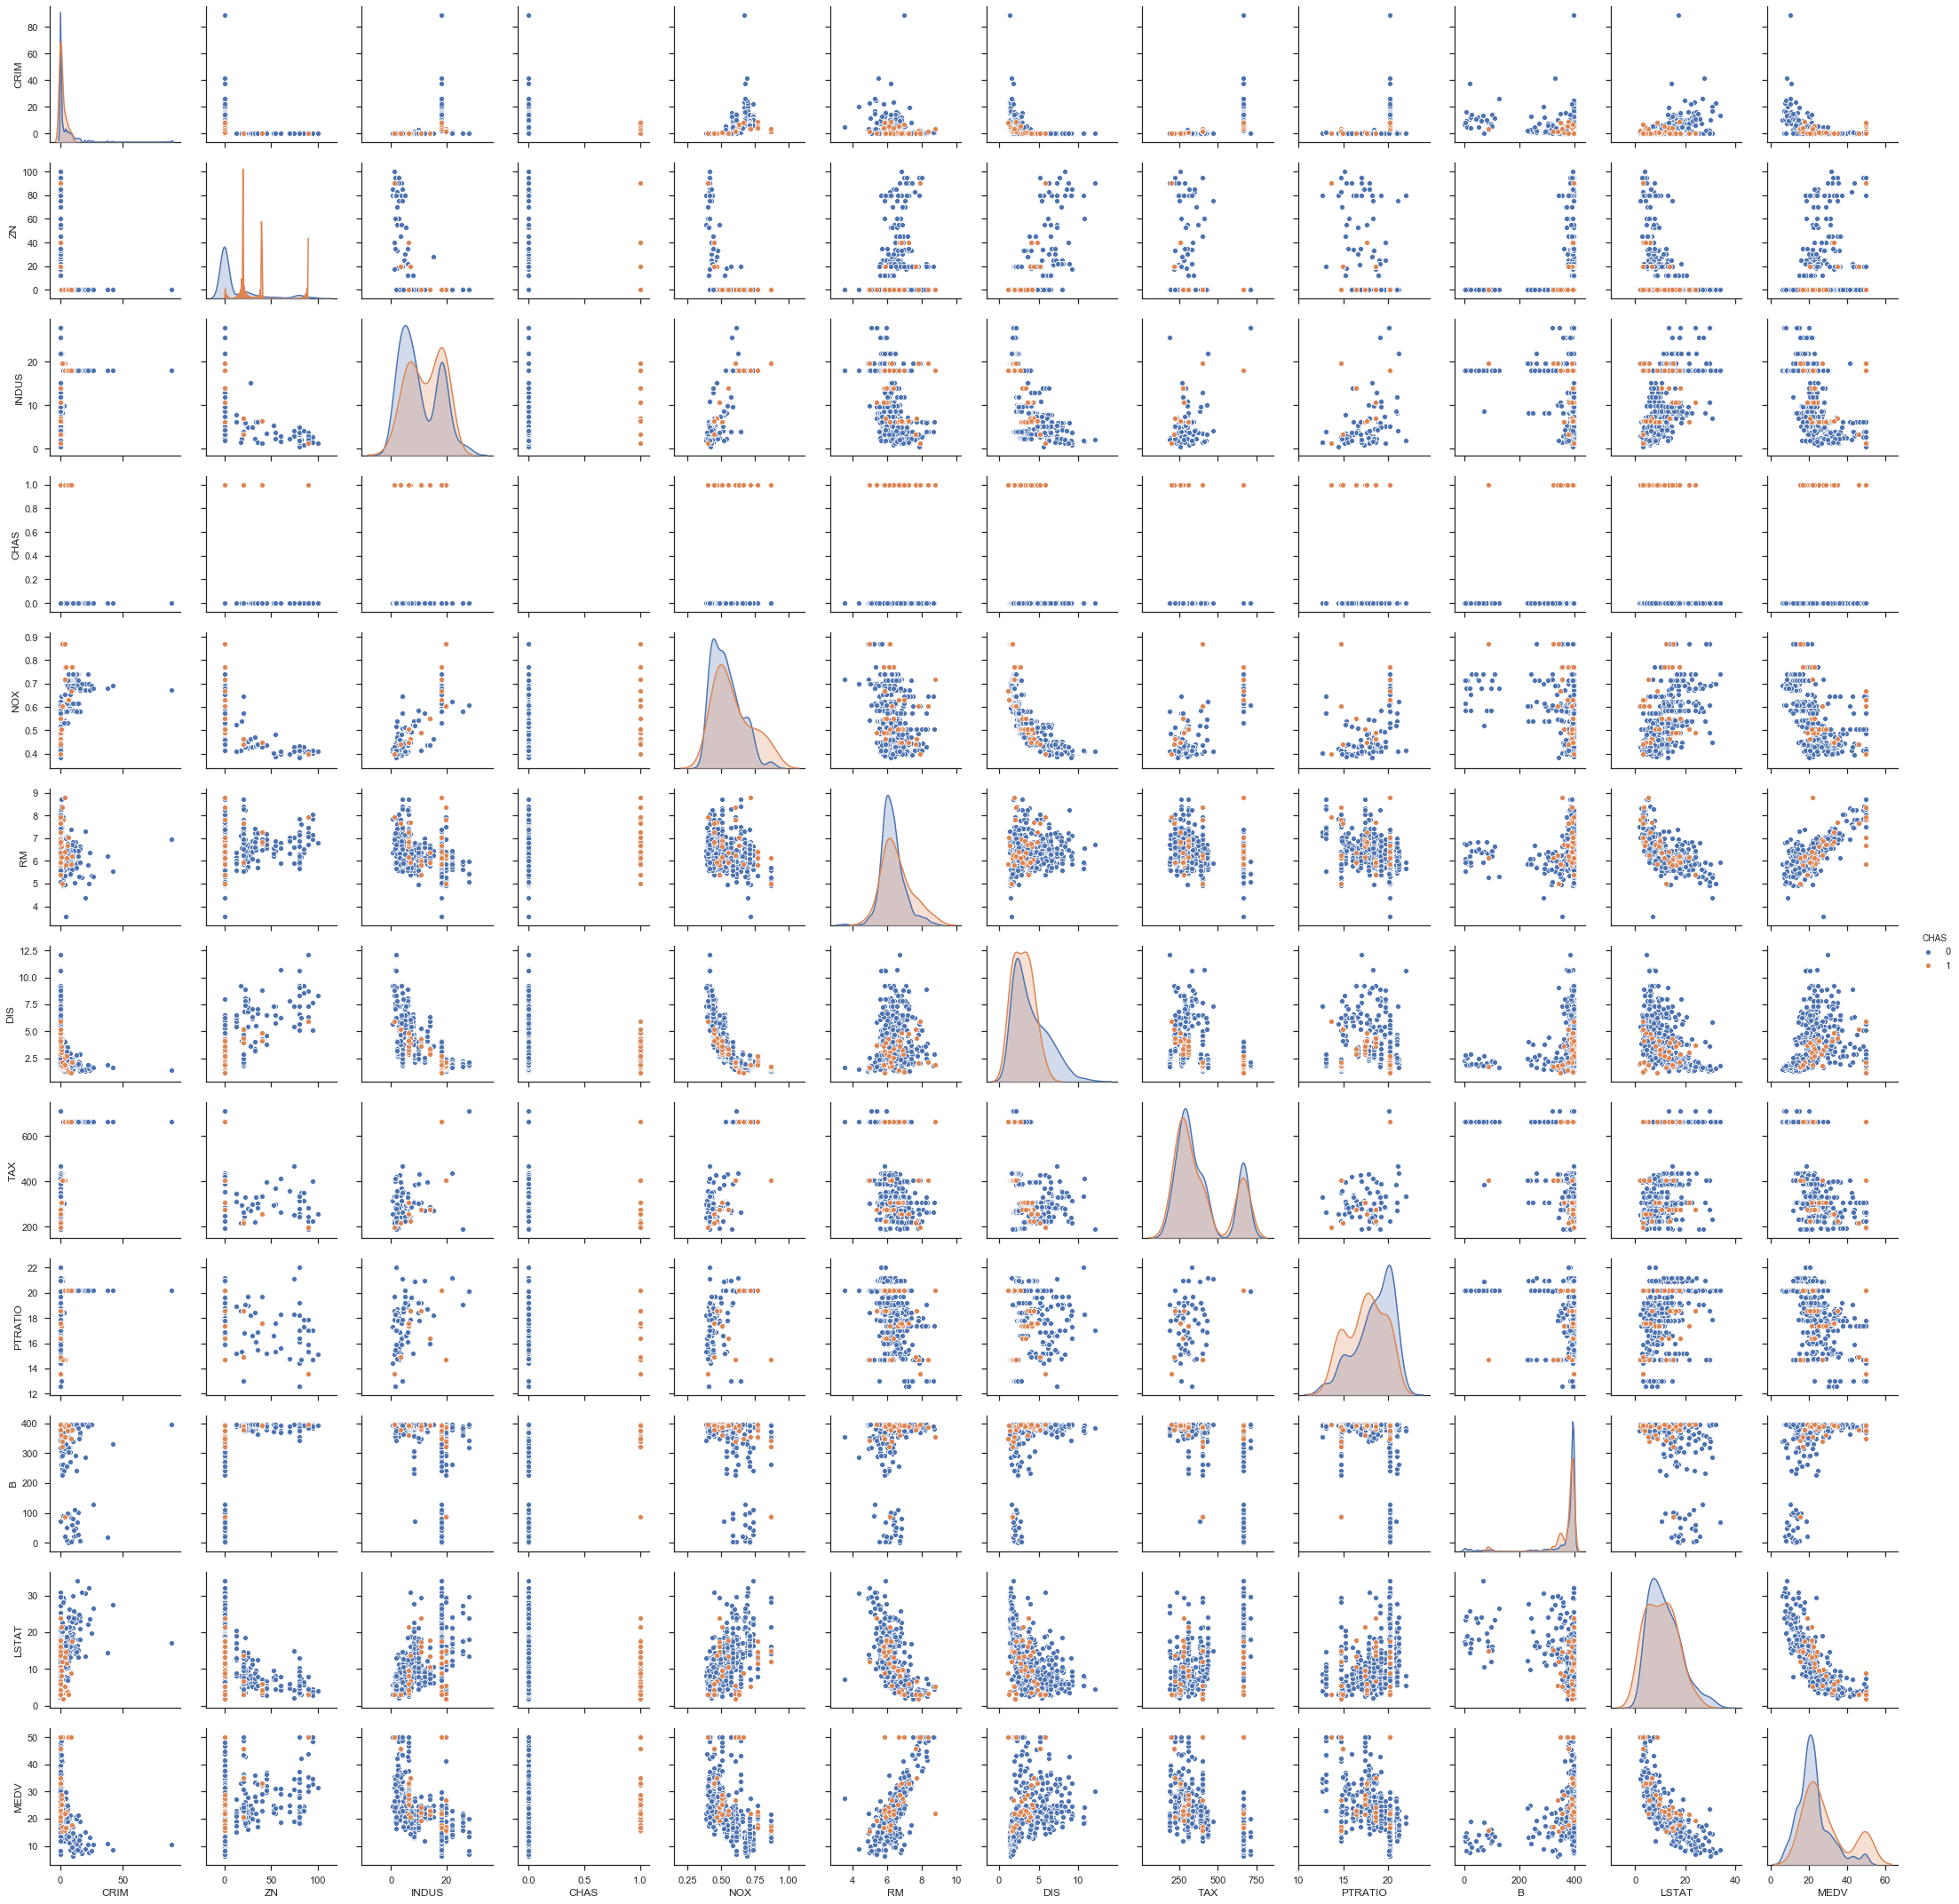

In [18]:
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data = data, hue='CHAS')
plt.show()

Мы видим, что данные имеющие значение параметра **CHAS** равное 1, на некоторых графиках выделяются в отдельную поведенческую группу.   
В этих группах есть намек на линейную корреляцию (**CRIM-MEDV, NODX-MEDV, RM-MEDV, LSTAT-MEDV** и другие).  
Есть смысл строить две модели для **CHAS**=1 и для **CHAS**=0

In [21]:
data_rich = data[data['CHAS'] == 1]
data_rich = data_rich.drop(['CHAS'], axis = 1)
data_rich.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 152 to 372
Data columns (total 11 columns):
CRIM       33 non-null float64
ZN         33 non-null float64
INDUS      33 non-null float64
NOX        33 non-null float64
RM         33 non-null float64
DIS        33 non-null float64
TAX        33 non-null int64
PTRATIO    33 non-null float64
B          33 non-null float64
LSTAT      33 non-null float64
MEDV       33 non-null float64
dtypes: float64(10), int64(1)
memory usage: 3.1 KB


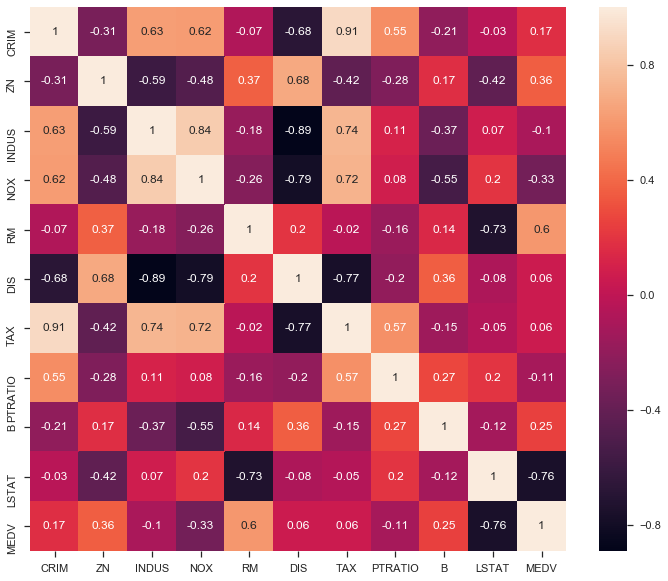

In [22]:
correlation_matrix = data_rich.corr().round(2)
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

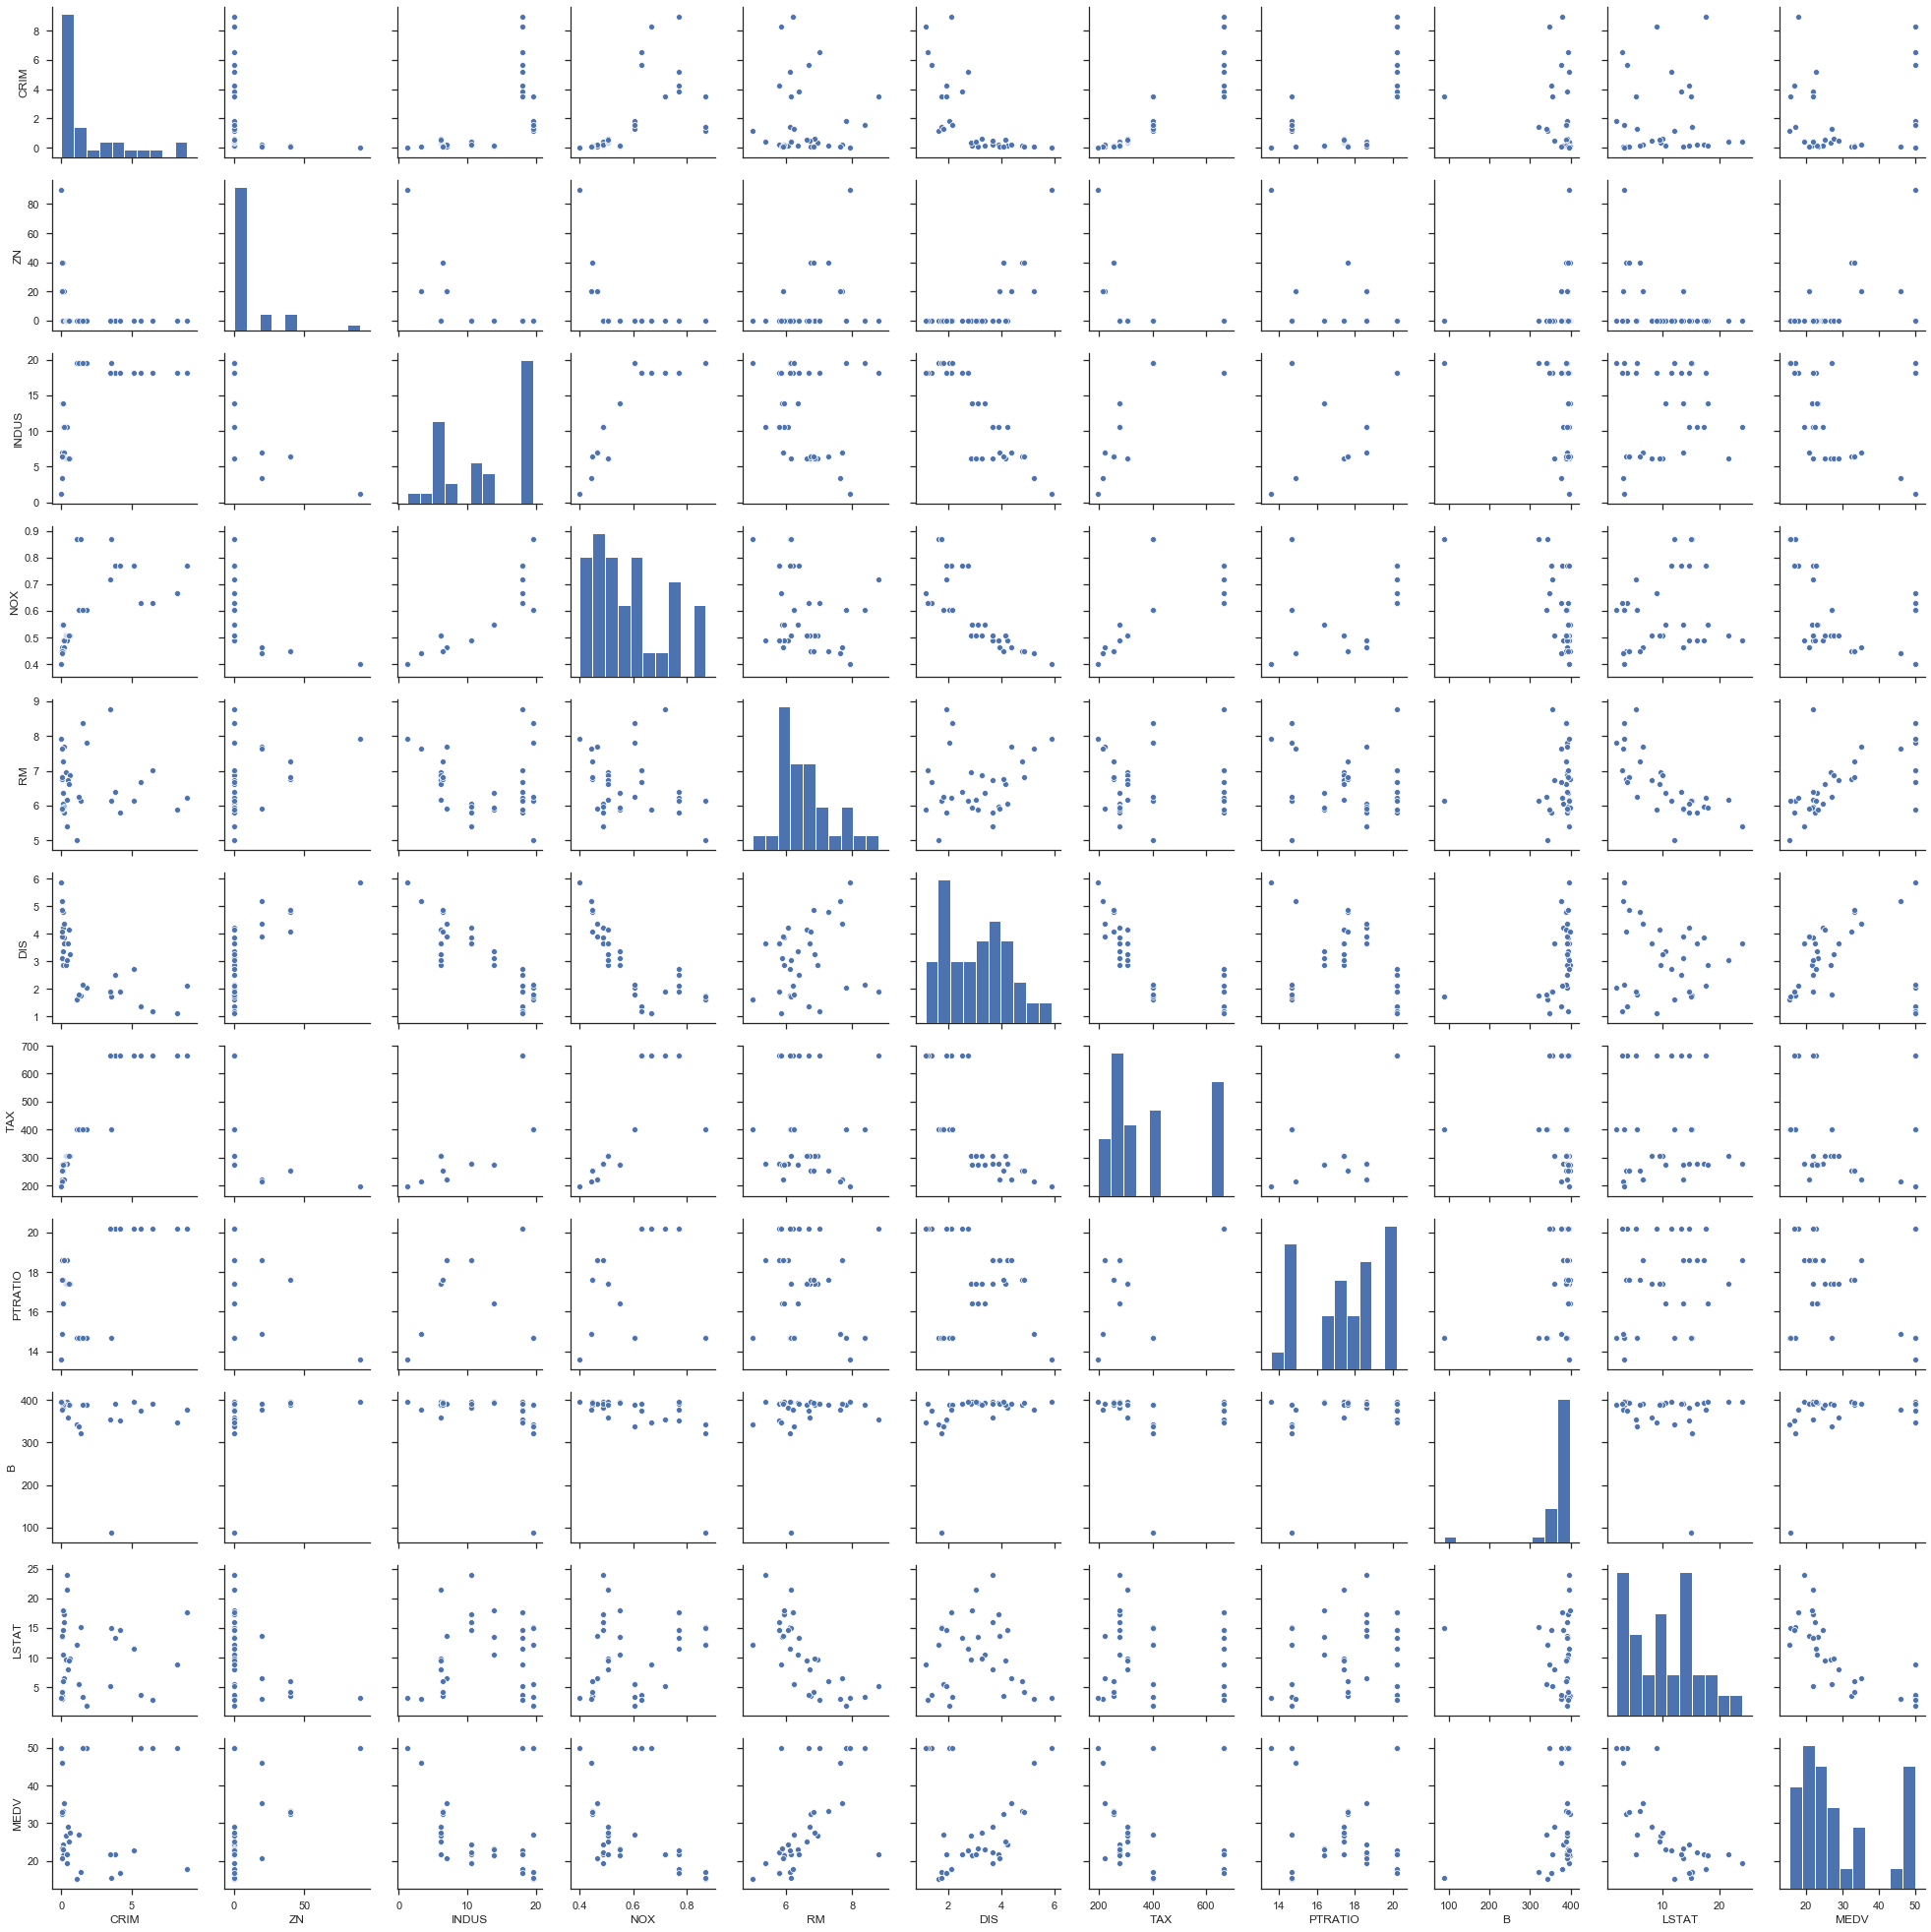

In [23]:
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data = data_rich)
plt.show()

На первый взгляд путь правильный, выделили четкую зависимость от четырех переменных **LSTAT, RM, ZN, NOX**, но есть еще аномалья цены в области **MEDV** = 50 и 49.

In [24]:
data_rich = data_rich[(data_rich['MEDV'] != 50) & (data_rich['MEDV'] != 49)]
data_rich.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 152 to 364
Data columns (total 11 columns):
CRIM       27 non-null float64
ZN         27 non-null float64
INDUS      27 non-null float64
NOX        27 non-null float64
RM         27 non-null float64
DIS        27 non-null float64
TAX        27 non-null int64
PTRATIO    27 non-null float64
B          27 non-null float64
LSTAT      27 non-null float64
MEDV       27 non-null float64
dtypes: float64(10), int64(1)
memory usage: 2.5 KB


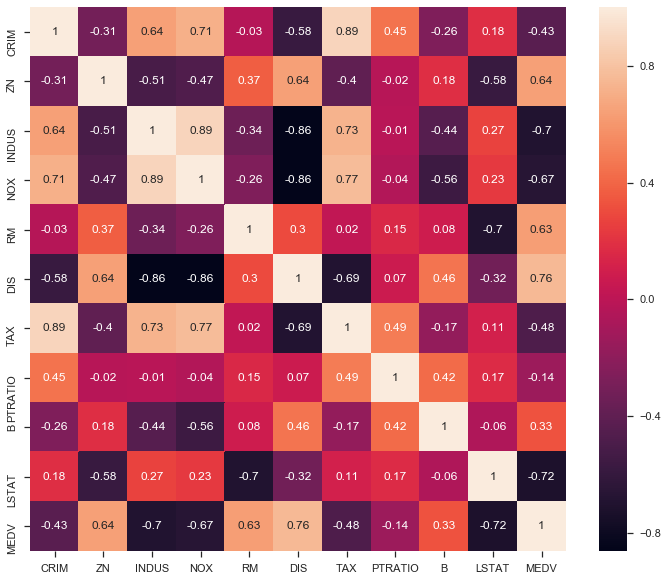

In [25]:
correlation_matrix = data_rich.corr().round(2)
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

Сильная корреляция целевого параметра почти со всеми признаками. Но можно выделить сильно коррелирующие пары.  
**LSTAT-ZN, LSTAT-RM, DIS-INDUS, DIS-NOX, DIS-TAX, DIS-CRIM**. **PTRATIO** можно отбросить как слабый. Остаются **B, LSTAT, DIS**.

In [28]:
X = data_rich[['LSTAT', 'DIS', 'B']]
Y = data_rich['MEDV']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
Y_pred = model.predict(X_test)

In [34]:
from sklearn.metrics import mean_absolute_error

In [35]:
mean_absolute_error(Y_pred,y_test)

2.9020177779059293

In [46]:
error = 2.9/Y*100
print('Средняя ошибка ', error.mean(),' %')

Средняя ошибка  12.643270264174657  %


In [48]:
model.coef_

array([-0.58053947,  4.48735018, -0.03788835])

In [50]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


**По моему довольно успешная модель для медианной цены домов, расположенных вблизи воды с неаномальной медианной ценой**

Изучаем оставшийся сет с **CHAS** = 0

In [52]:
data_indigent = data[data['CHAS'] == 0]
data_indigent = data_indigent.drop(['CHAS'], axis = 1)
data_indigent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 0 to 505
Data columns (total 11 columns):
CRIM       430 non-null float64
ZN         430 non-null float64
INDUS      430 non-null float64
NOX        430 non-null float64
RM         430 non-null float64
DIS        430 non-null float64
TAX        430 non-null int64
PTRATIO    430 non-null float64
B          430 non-null float64
LSTAT      430 non-null float64
MEDV       430 non-null float64
dtypes: float64(10), int64(1)
memory usage: 40.3 KB


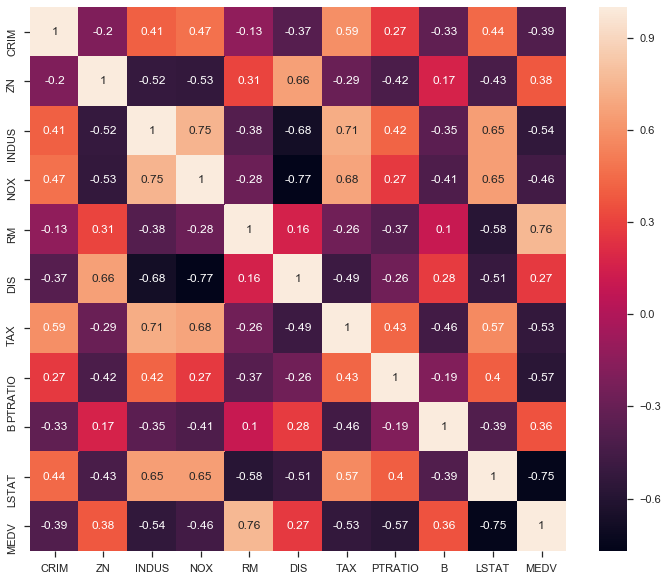

In [53]:
correlation_matrix = data_indigent.corr().round(2)
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

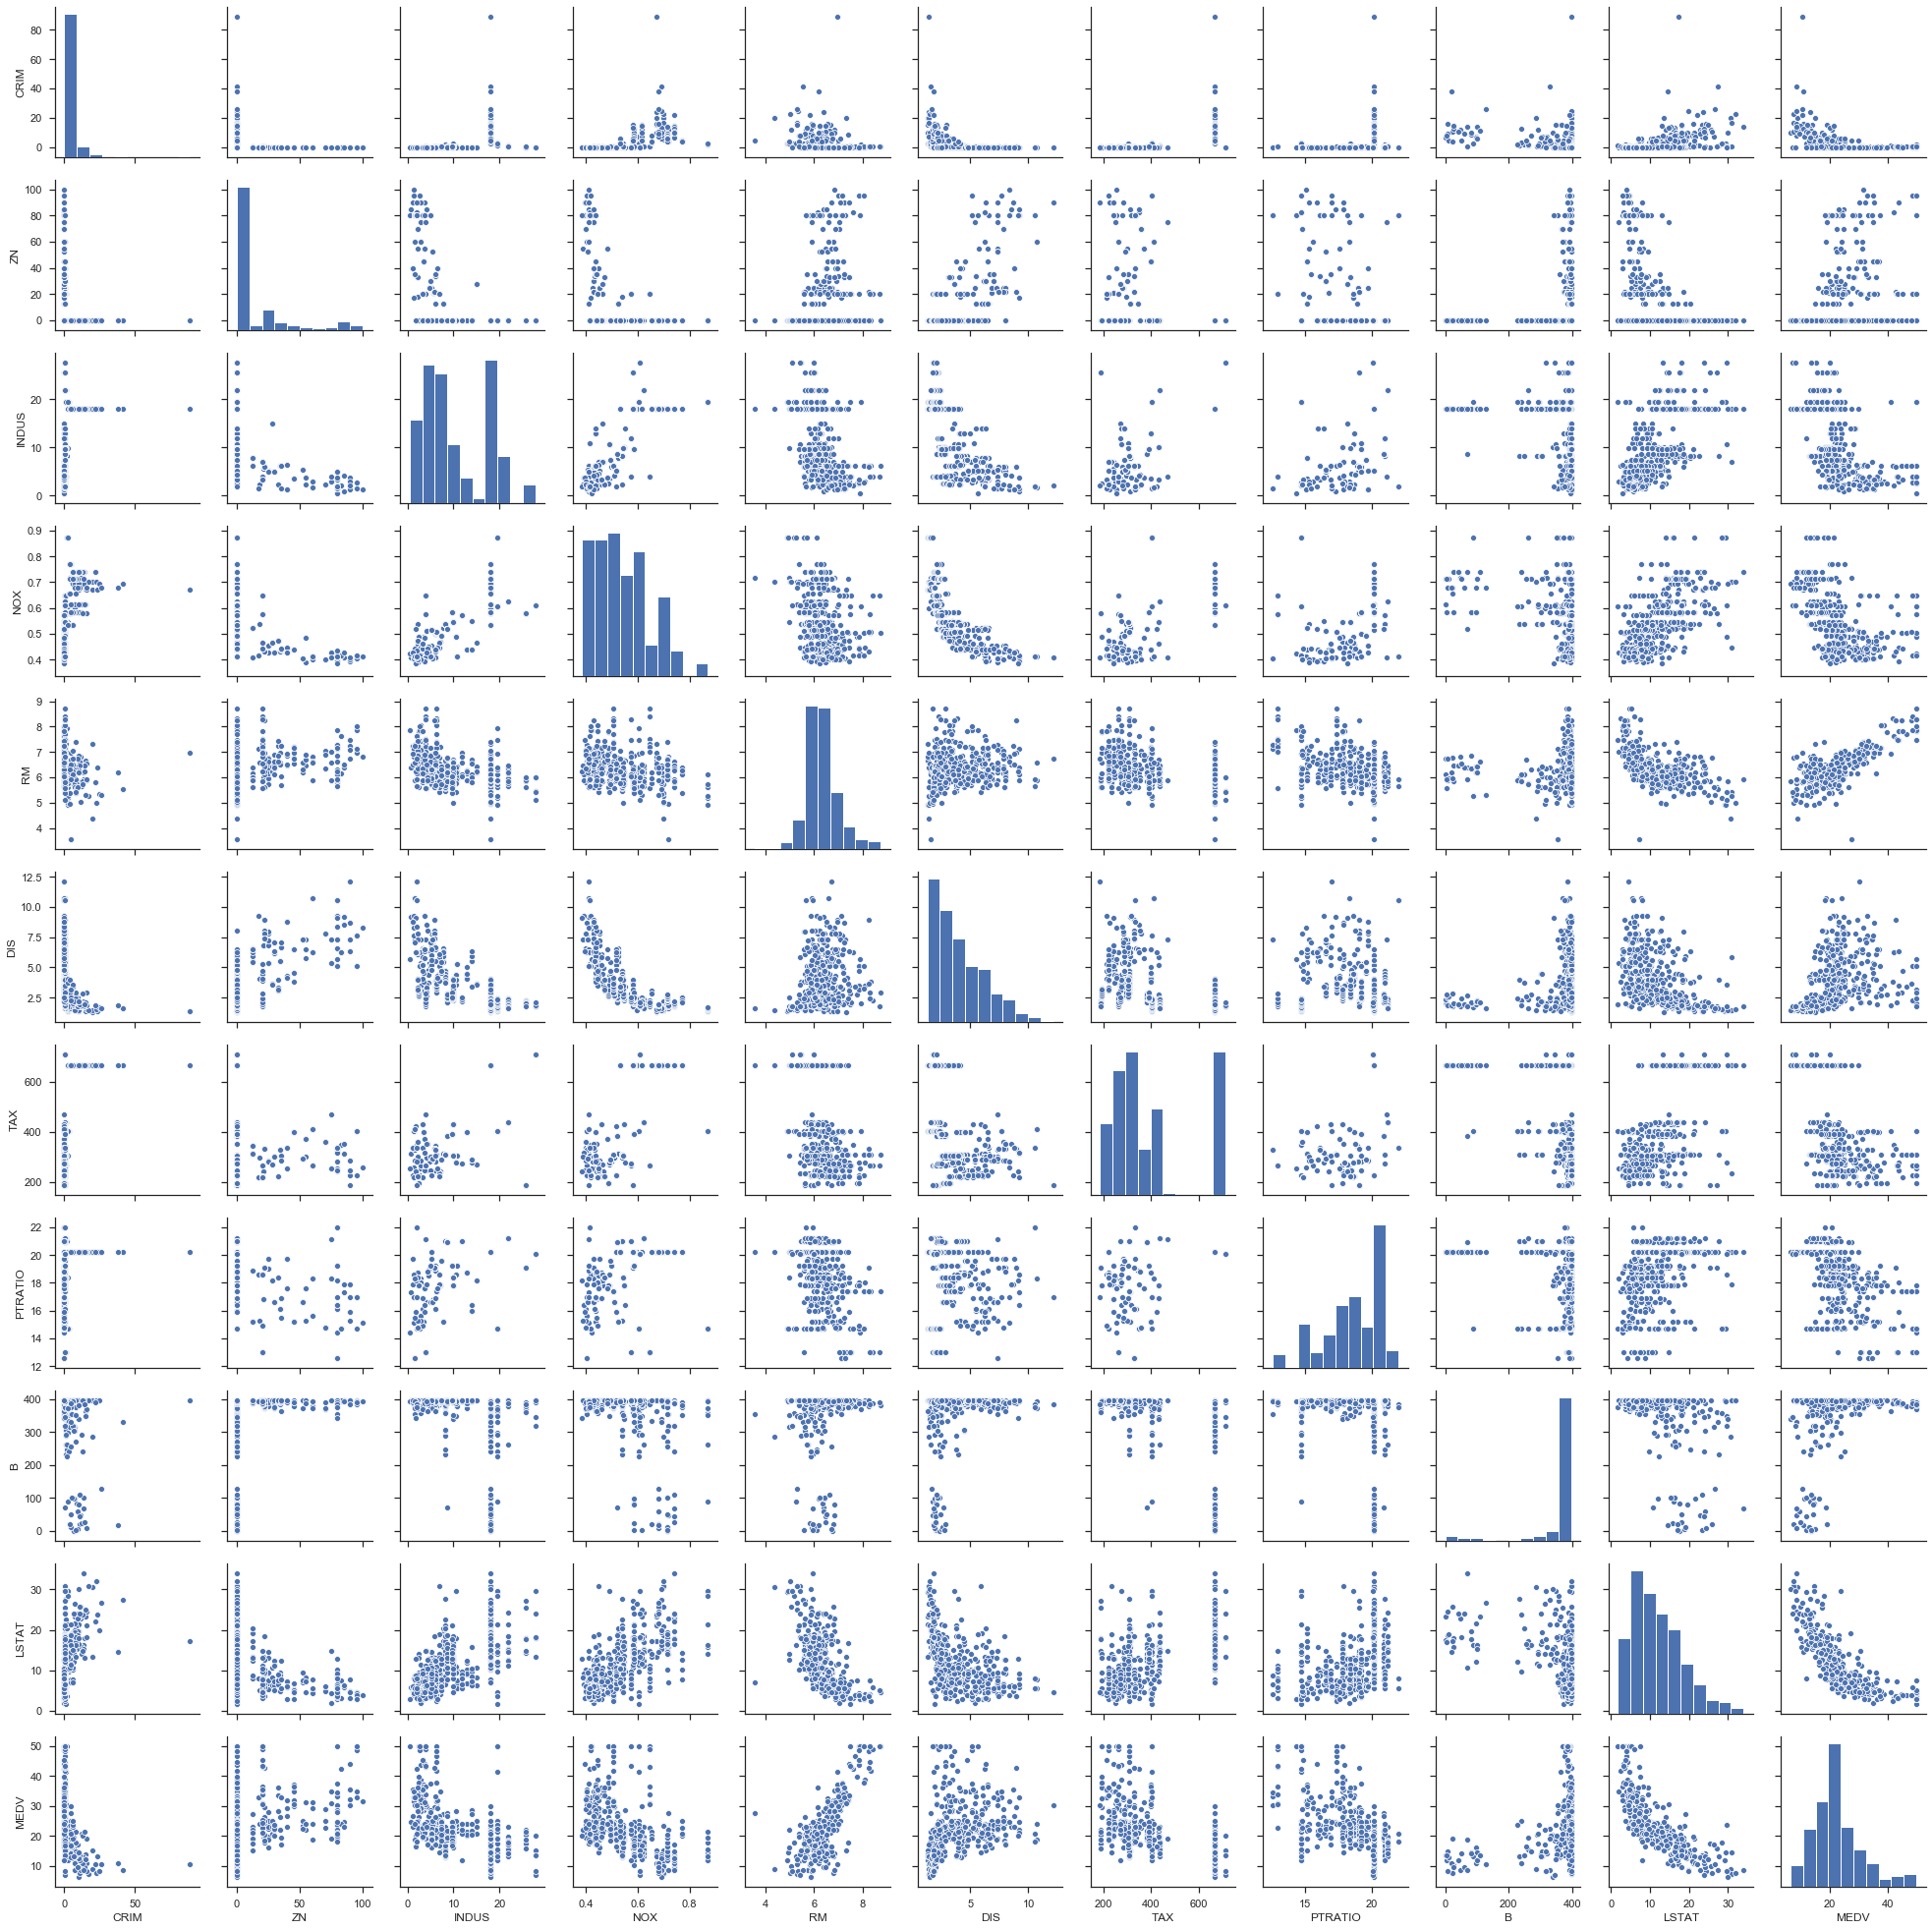

In [54]:
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data = data_indigent)
plt.show()

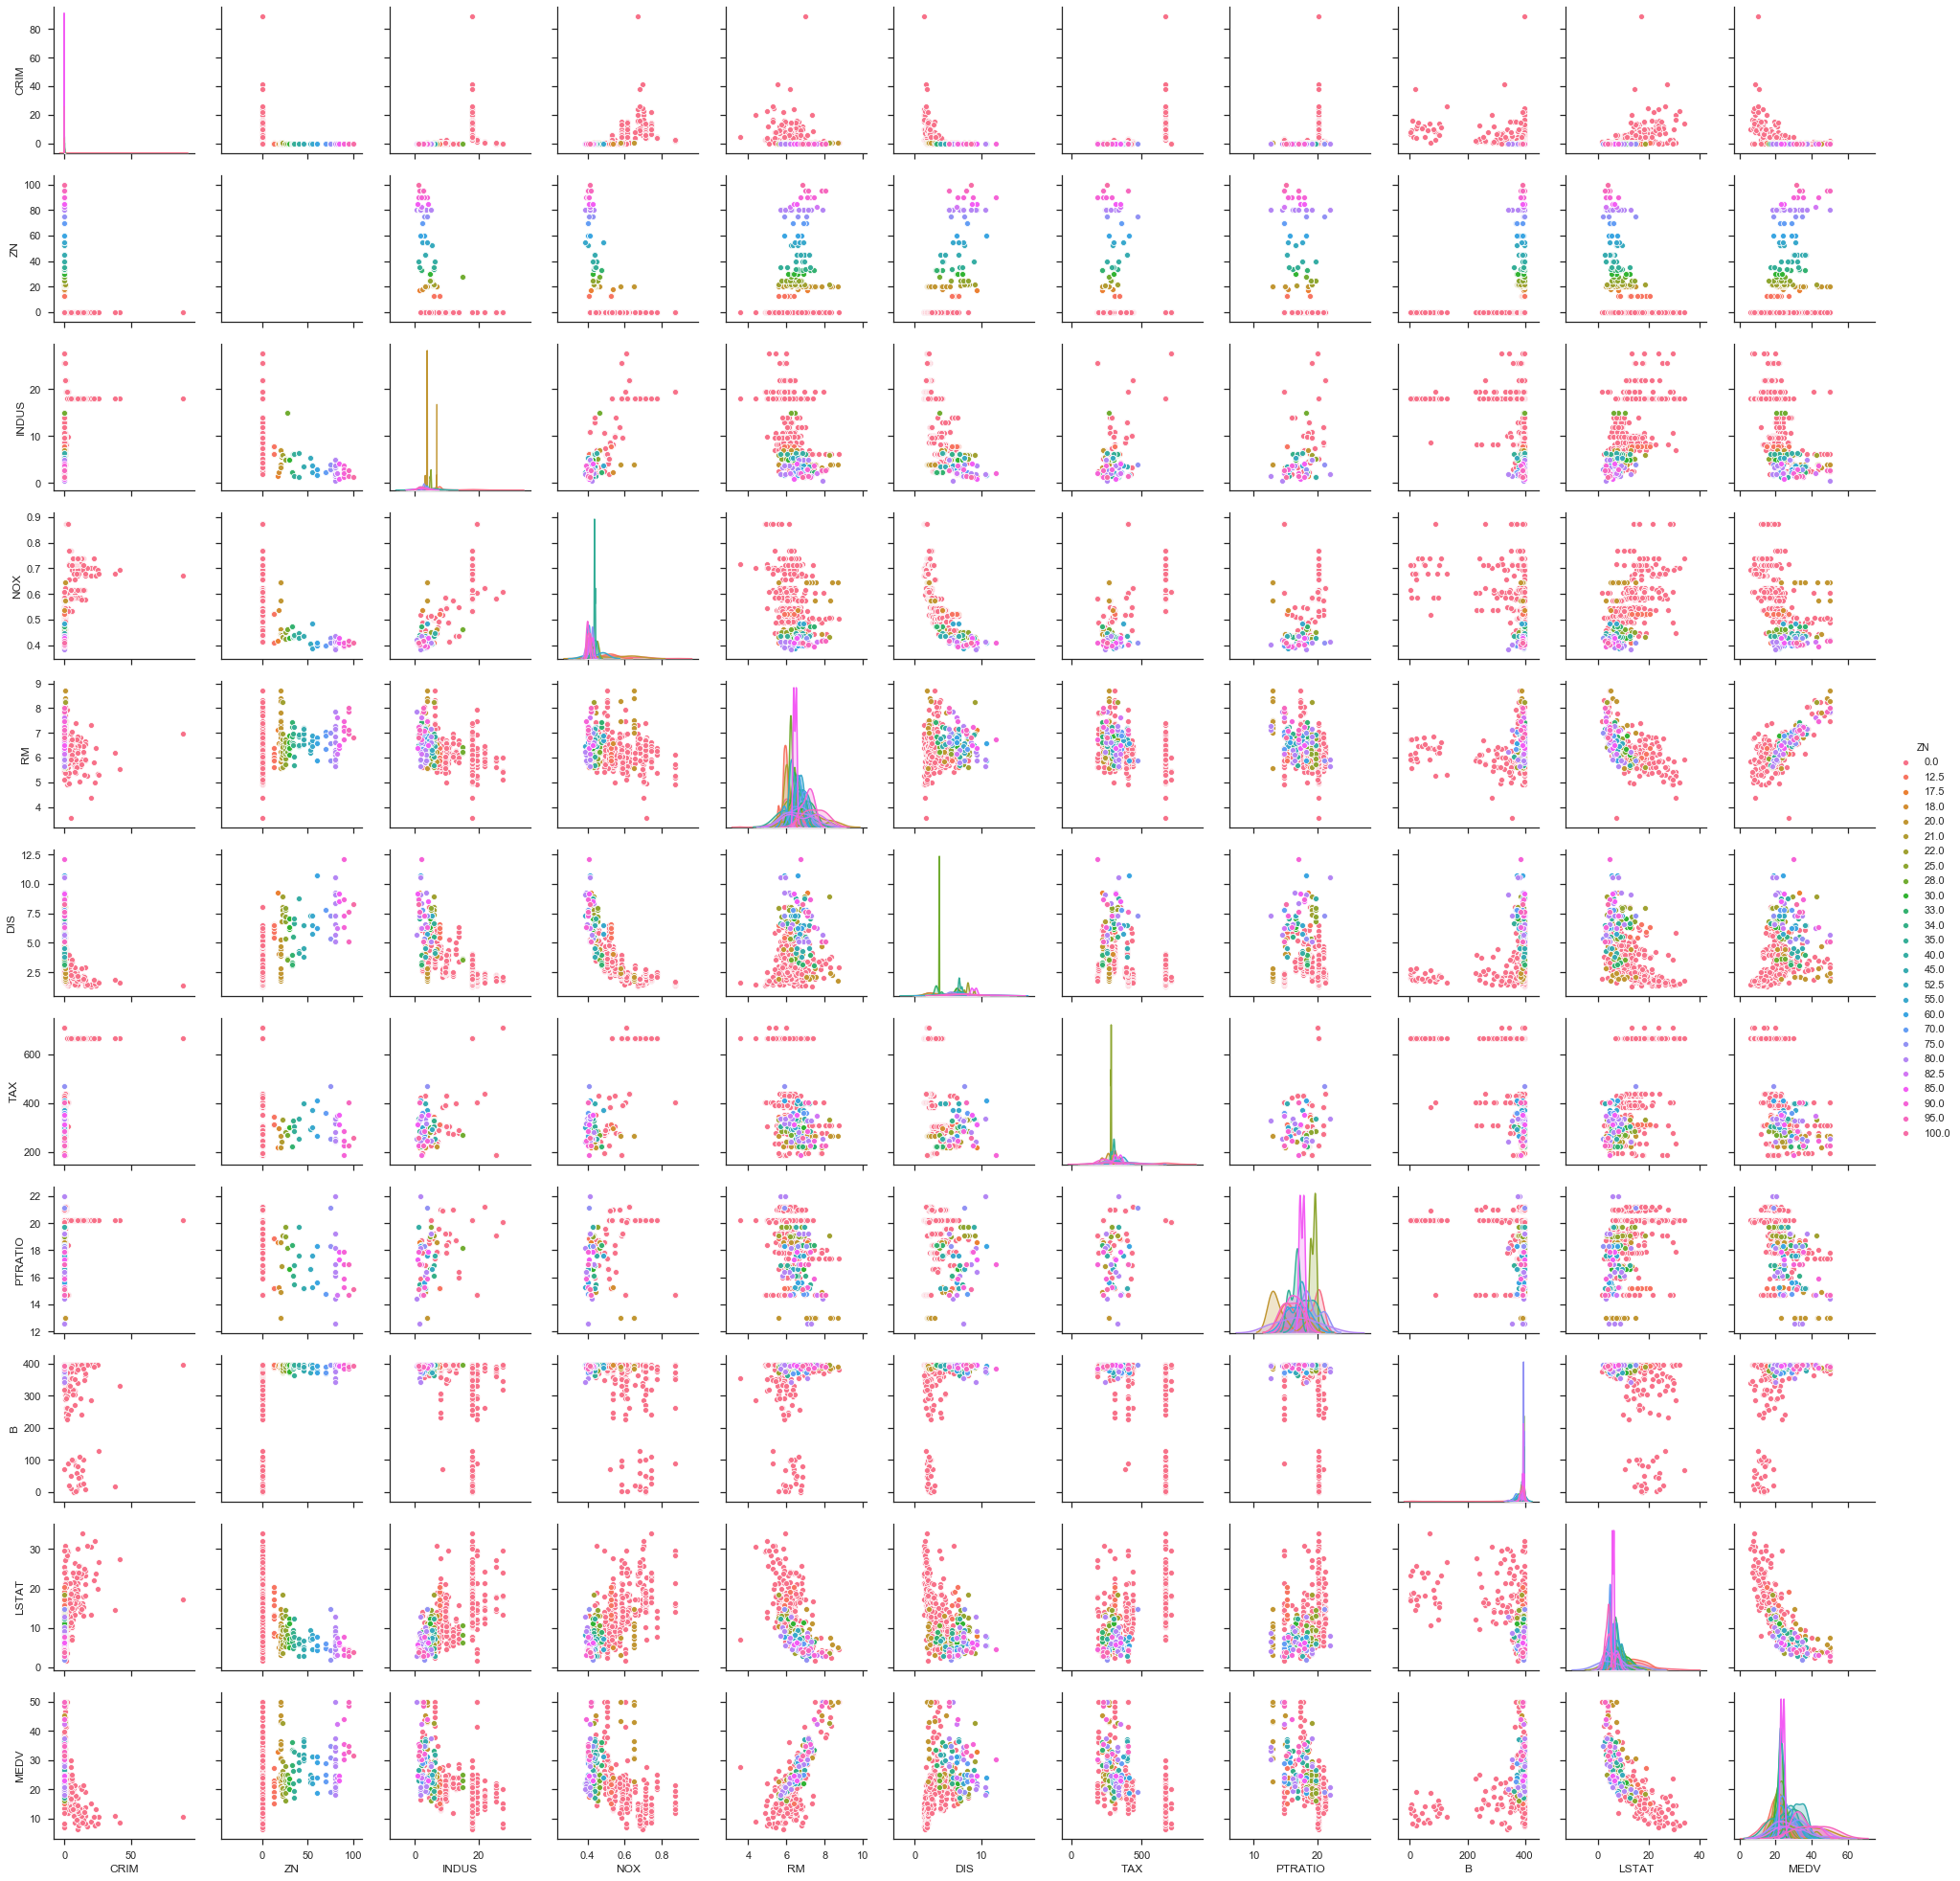

In [56]:
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data = data_indigent, hue='ZN')
plt.show()

In [57]:
data_zero = data_indigent[data_indigent['ZN'] == 0]

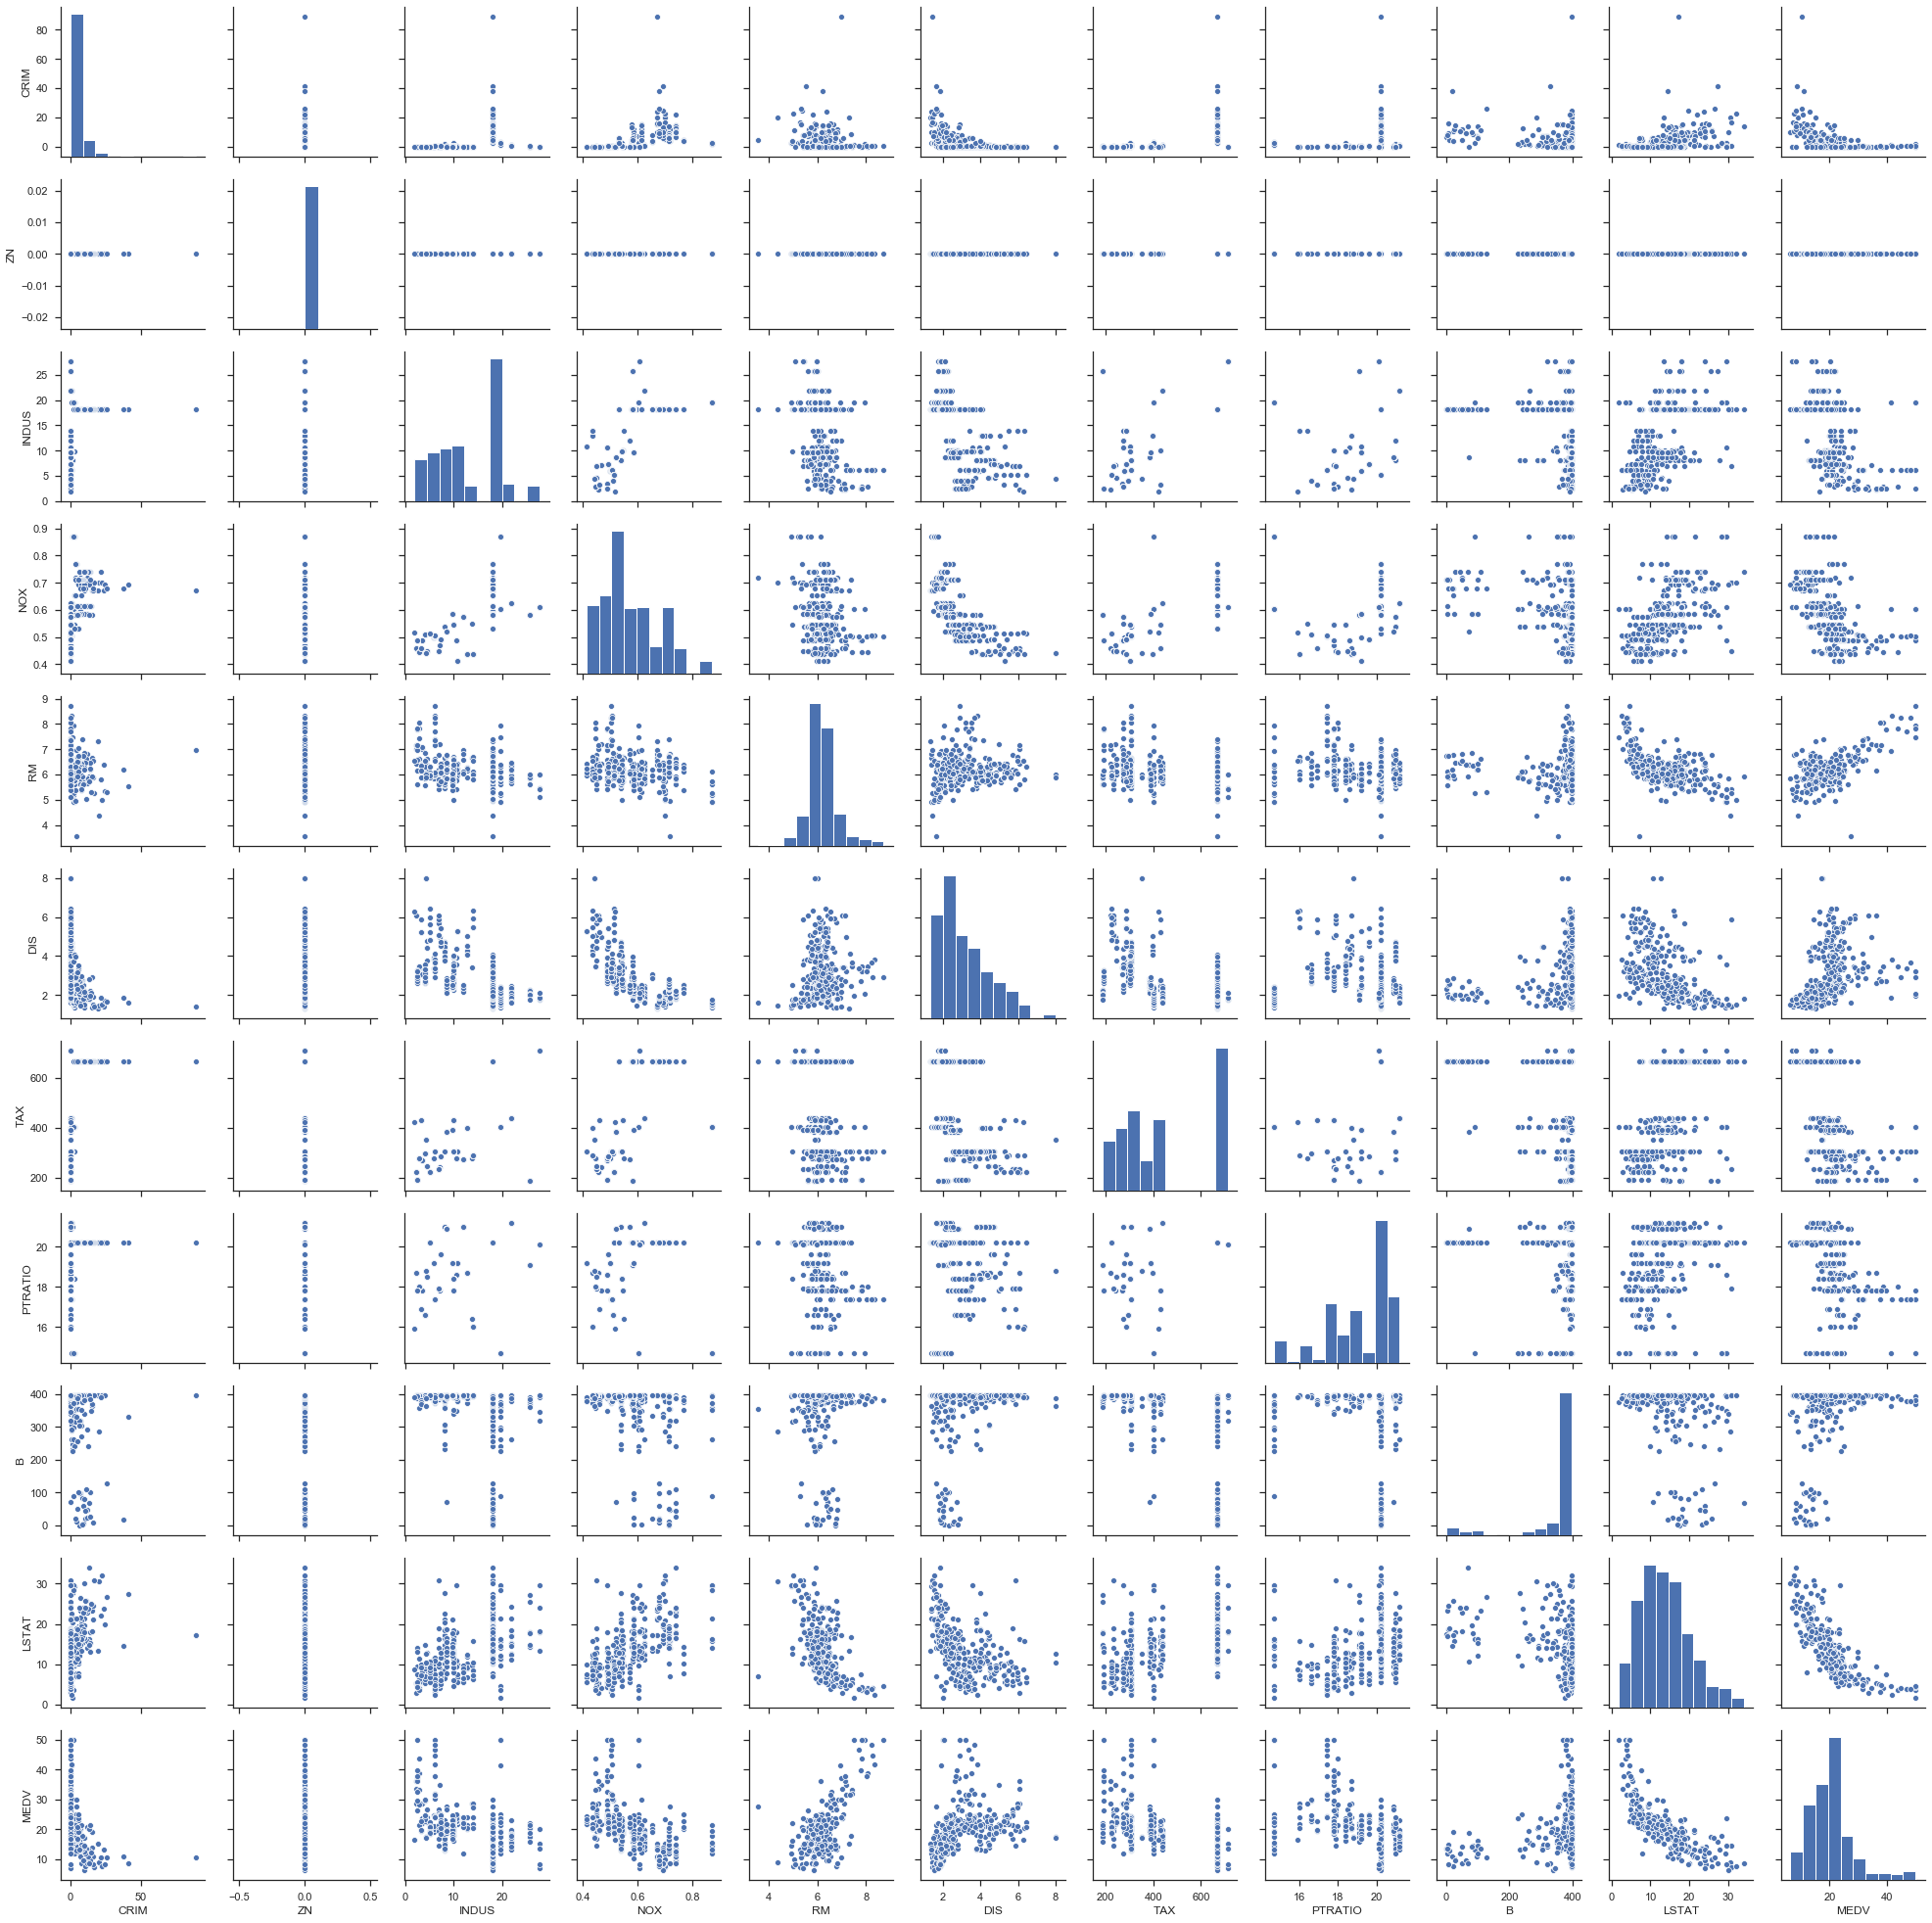

In [58]:
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data = data_zero)
plt.show()

In [80]:
data_zero_more = data_zero[data_zero['TAX'] > 600]

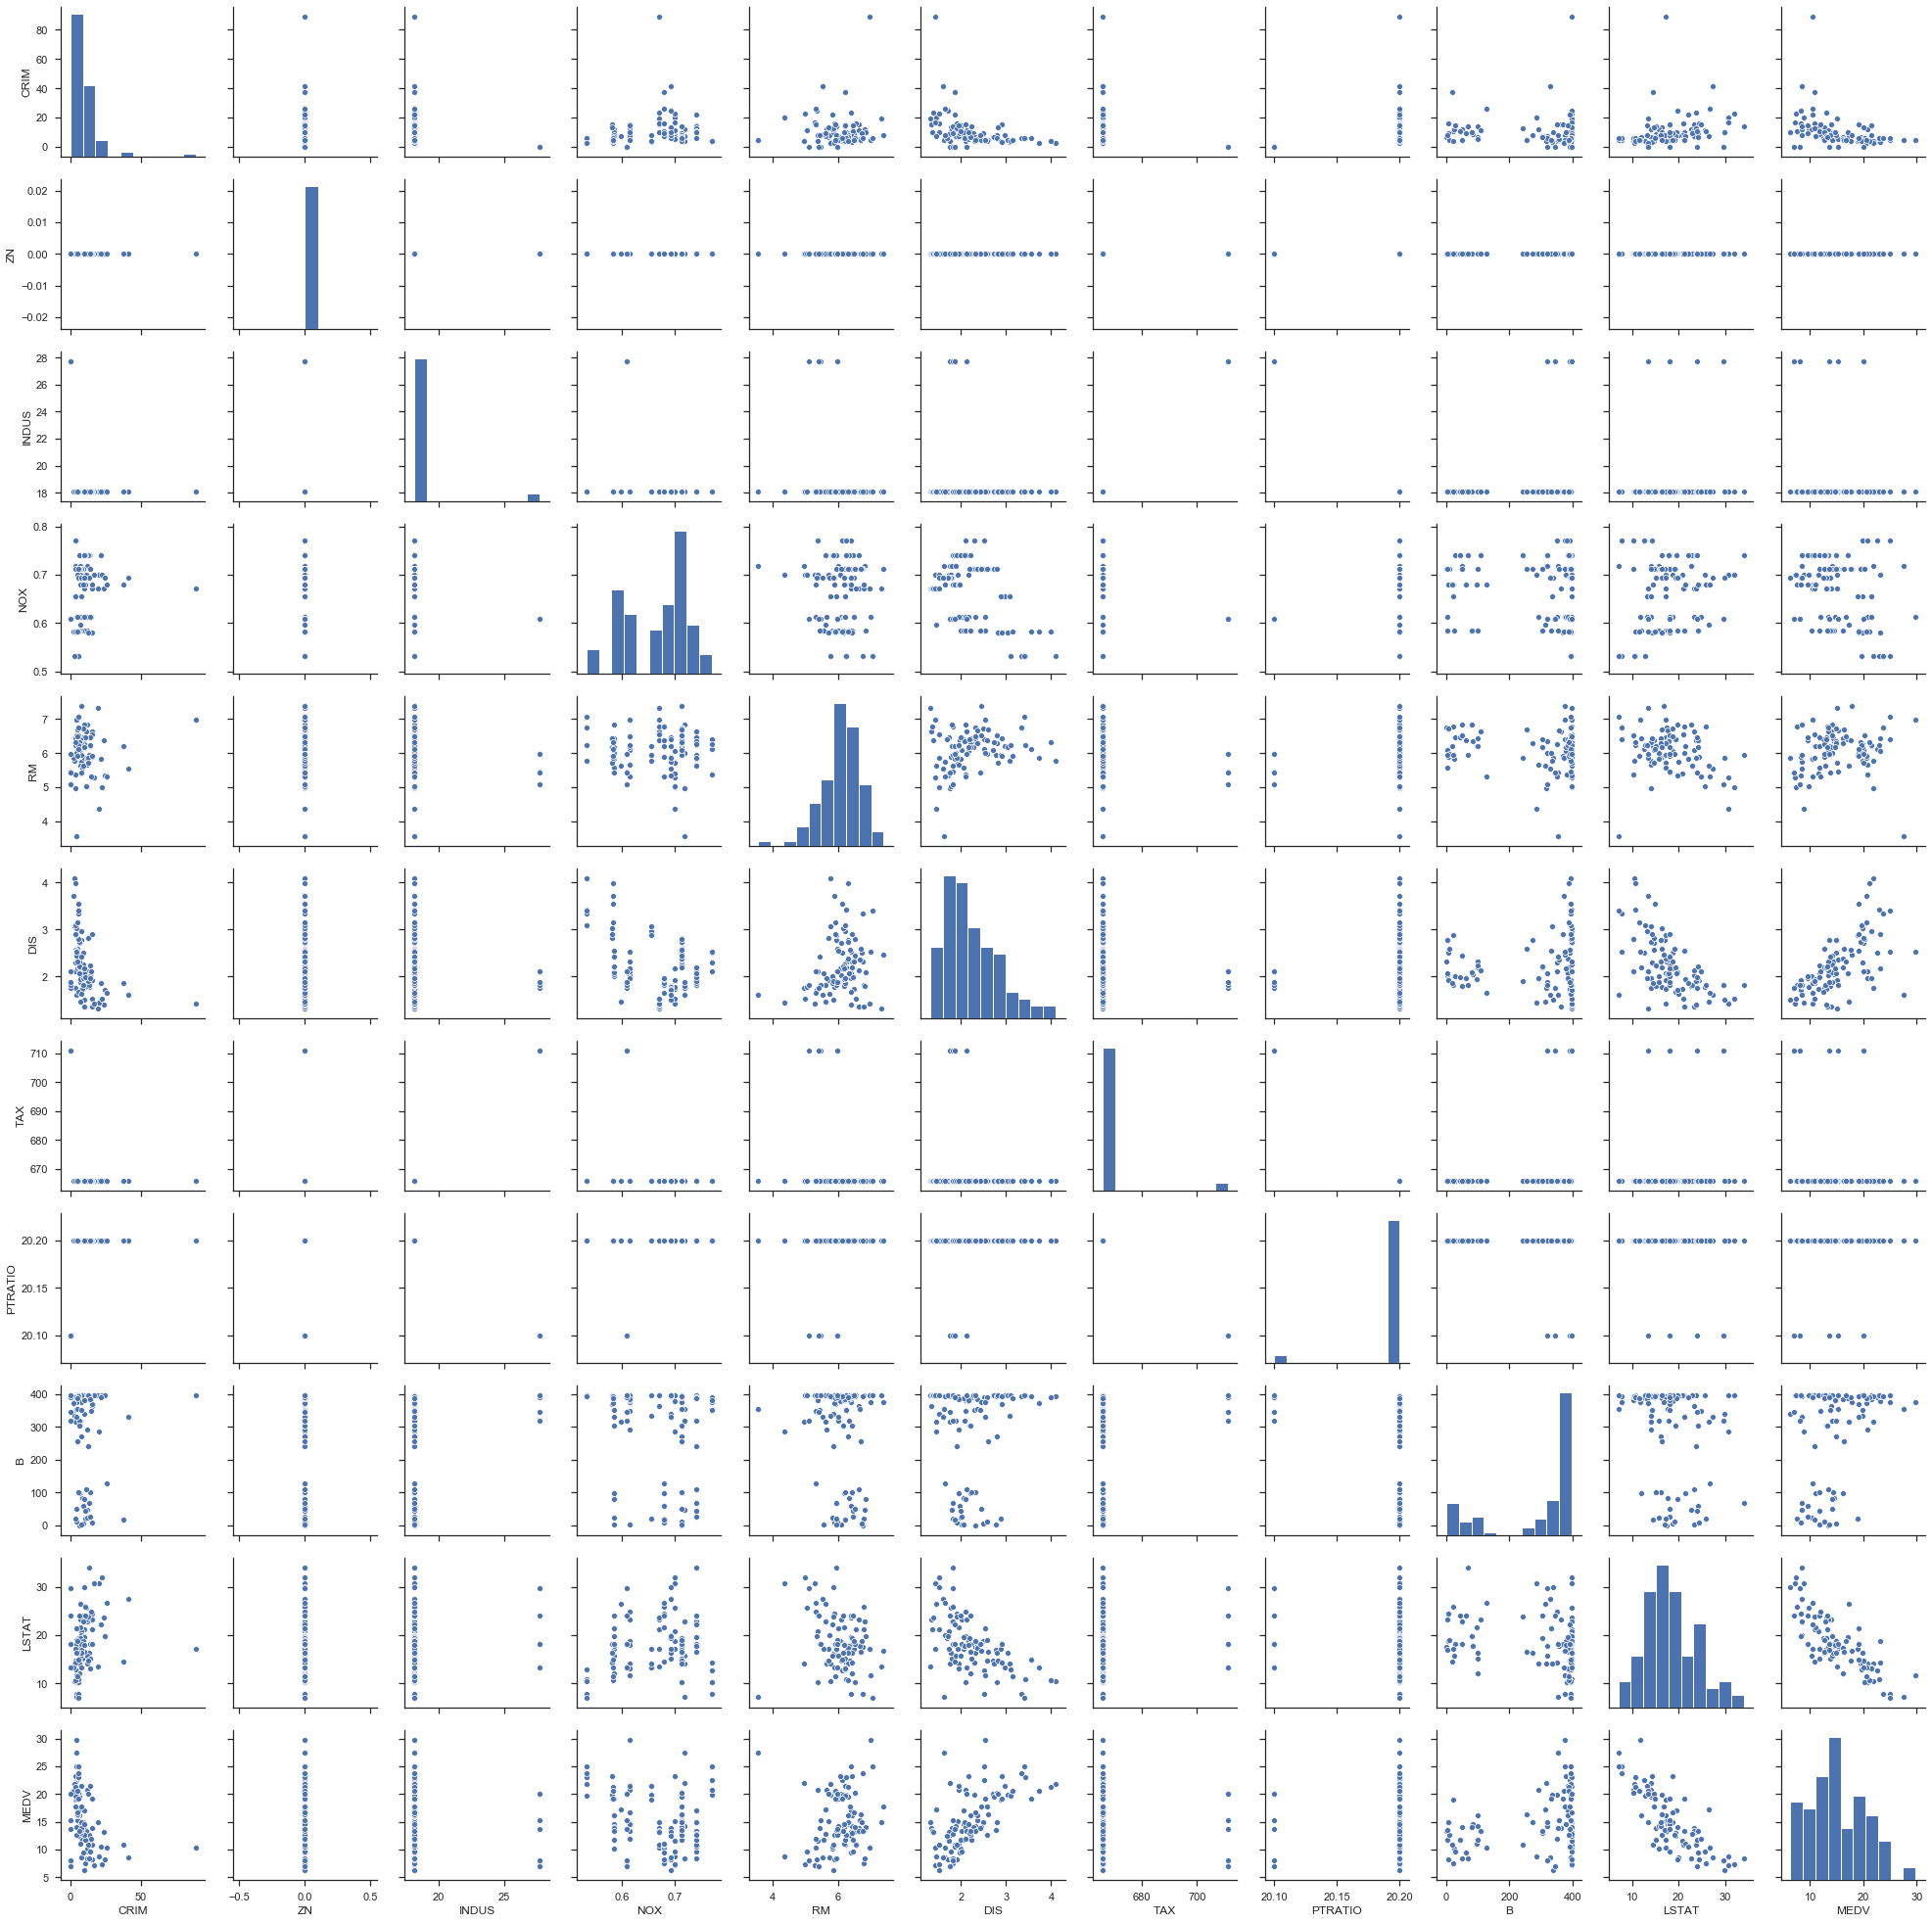

In [81]:
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data = data_zero_more)
plt.show()

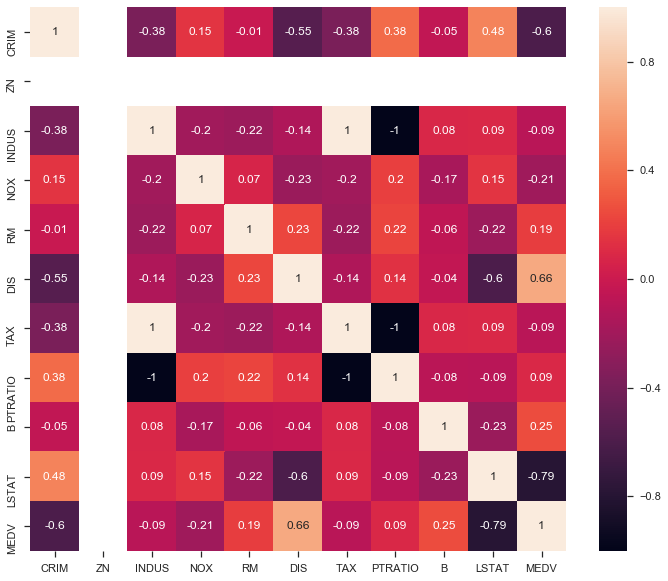

In [82]:
correlation_matrix = data_zero_more.corr(method = 'spearman').round(2)
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

In [83]:
X = data_zero_more[['LSTAT', 'DIS', 'CRIM']]
Y = data_zero_more['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)
model = LinearRegression()
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
mean_absolute_error(Y_pred,y_test)

1.6599435877687525

In [64]:
error = 2.9/Y*100
print('Средняя ошибка ', error.mean(),' %')

Средняя ошибка  21.456337324808228  %


In [65]:
model.coef_

array([-0.58276509,  1.66489546, -0.07990616])

По-моему тоже неплохо. Удивительно, что коэффициент при **LSTAT**, почти одинаковый

**Данная модель работоспособна для домов расположенных далеко от воды, с высокими налогами и небольшими участками**

In [66]:
data_no_zero = data_indigent[data_indigent['ZN'] != 0]

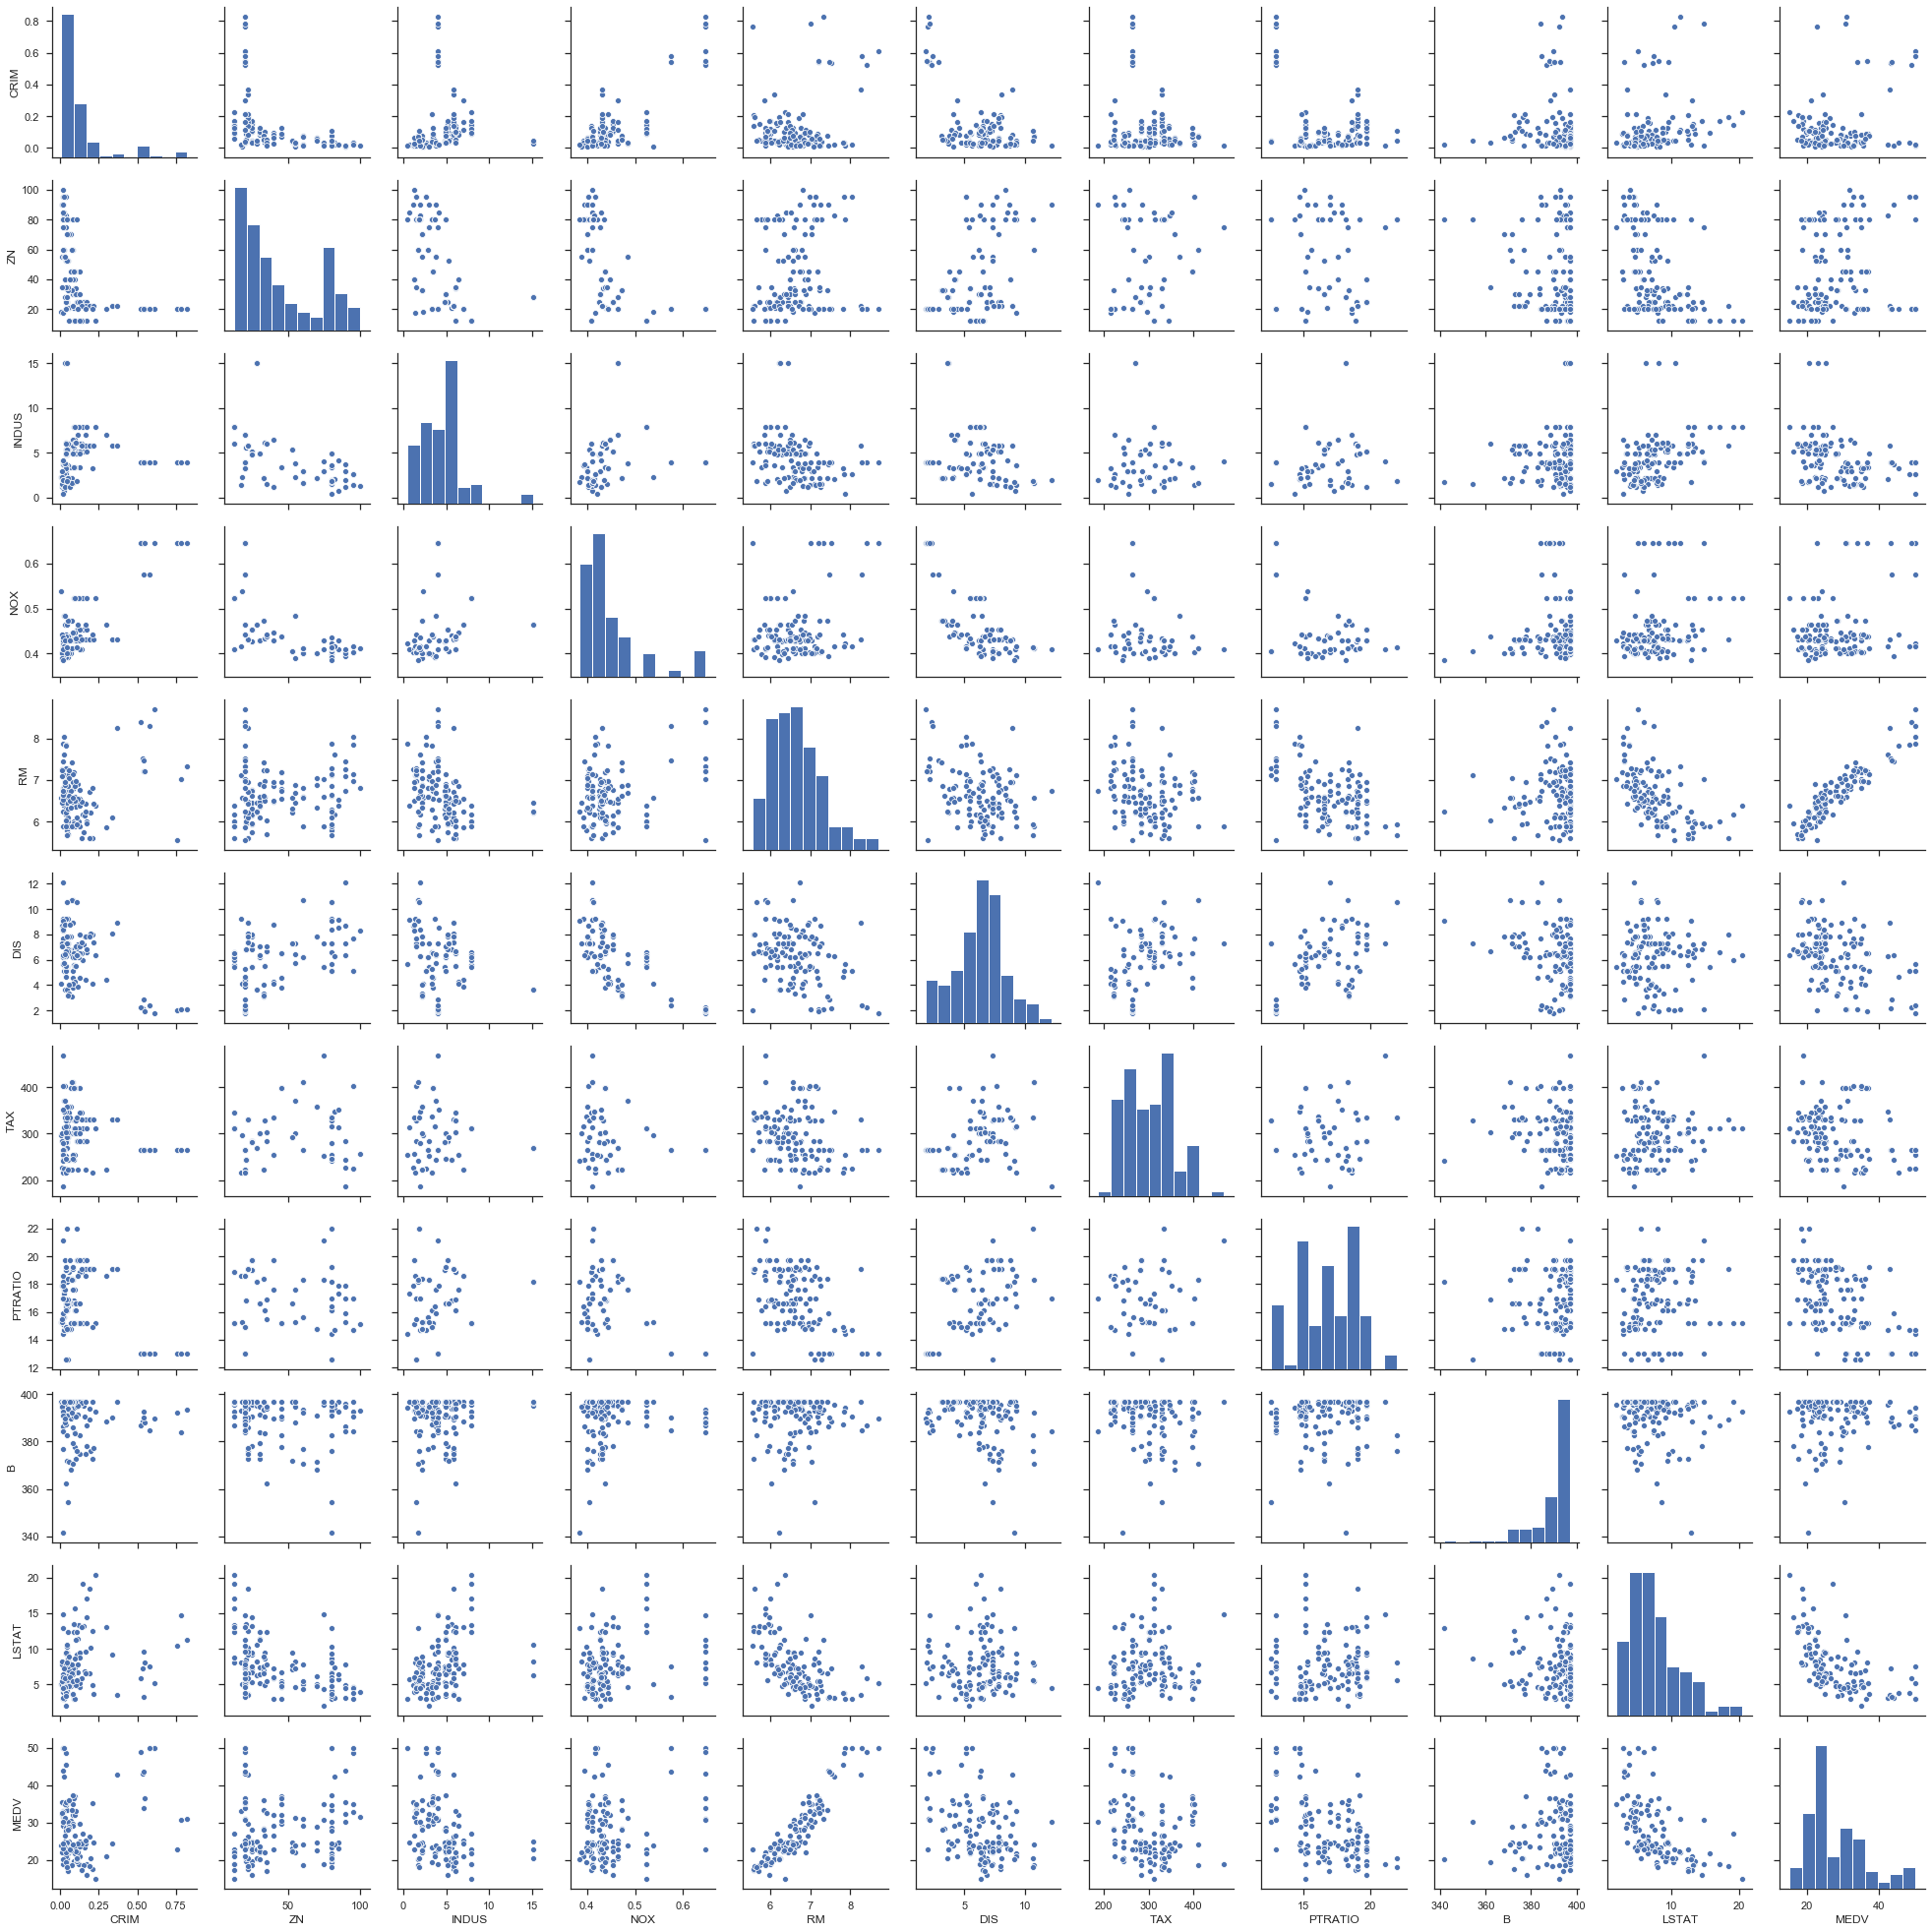

In [67]:
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data = data_no_zero)
plt.show()

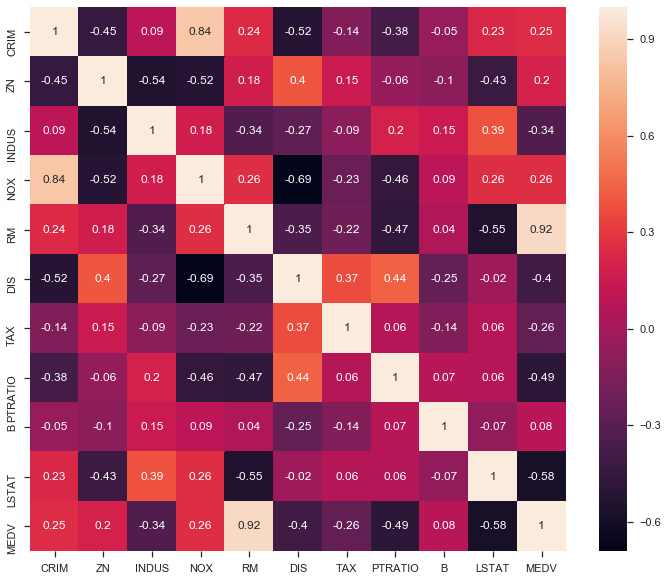

In [72]:
correlation_matrix = data_no_zero.corr().round(2)
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

In [76]:
X = data_no_zero[['LSTAT', 'RM', 'PTRATIO', 'DIS']]
Y = data_no_zero['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)
model = LinearRegression()
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
mean_absolute_error(Y_pred,y_test)

2.4306762046025243

In [77]:
error = 2.9/Y*100
print('Средняя ошибка ', error.mean(),' %')

Средняя ошибка  11.219806613631297  %


In [78]:
model.coef_

array([-0.53111625,  9.67165454, -0.31564009, -0.49894113])

**Далеко от воды с большими участками** 

In [79]:
data_zero_less = data_zero[data_zero['TAX'] < 600]

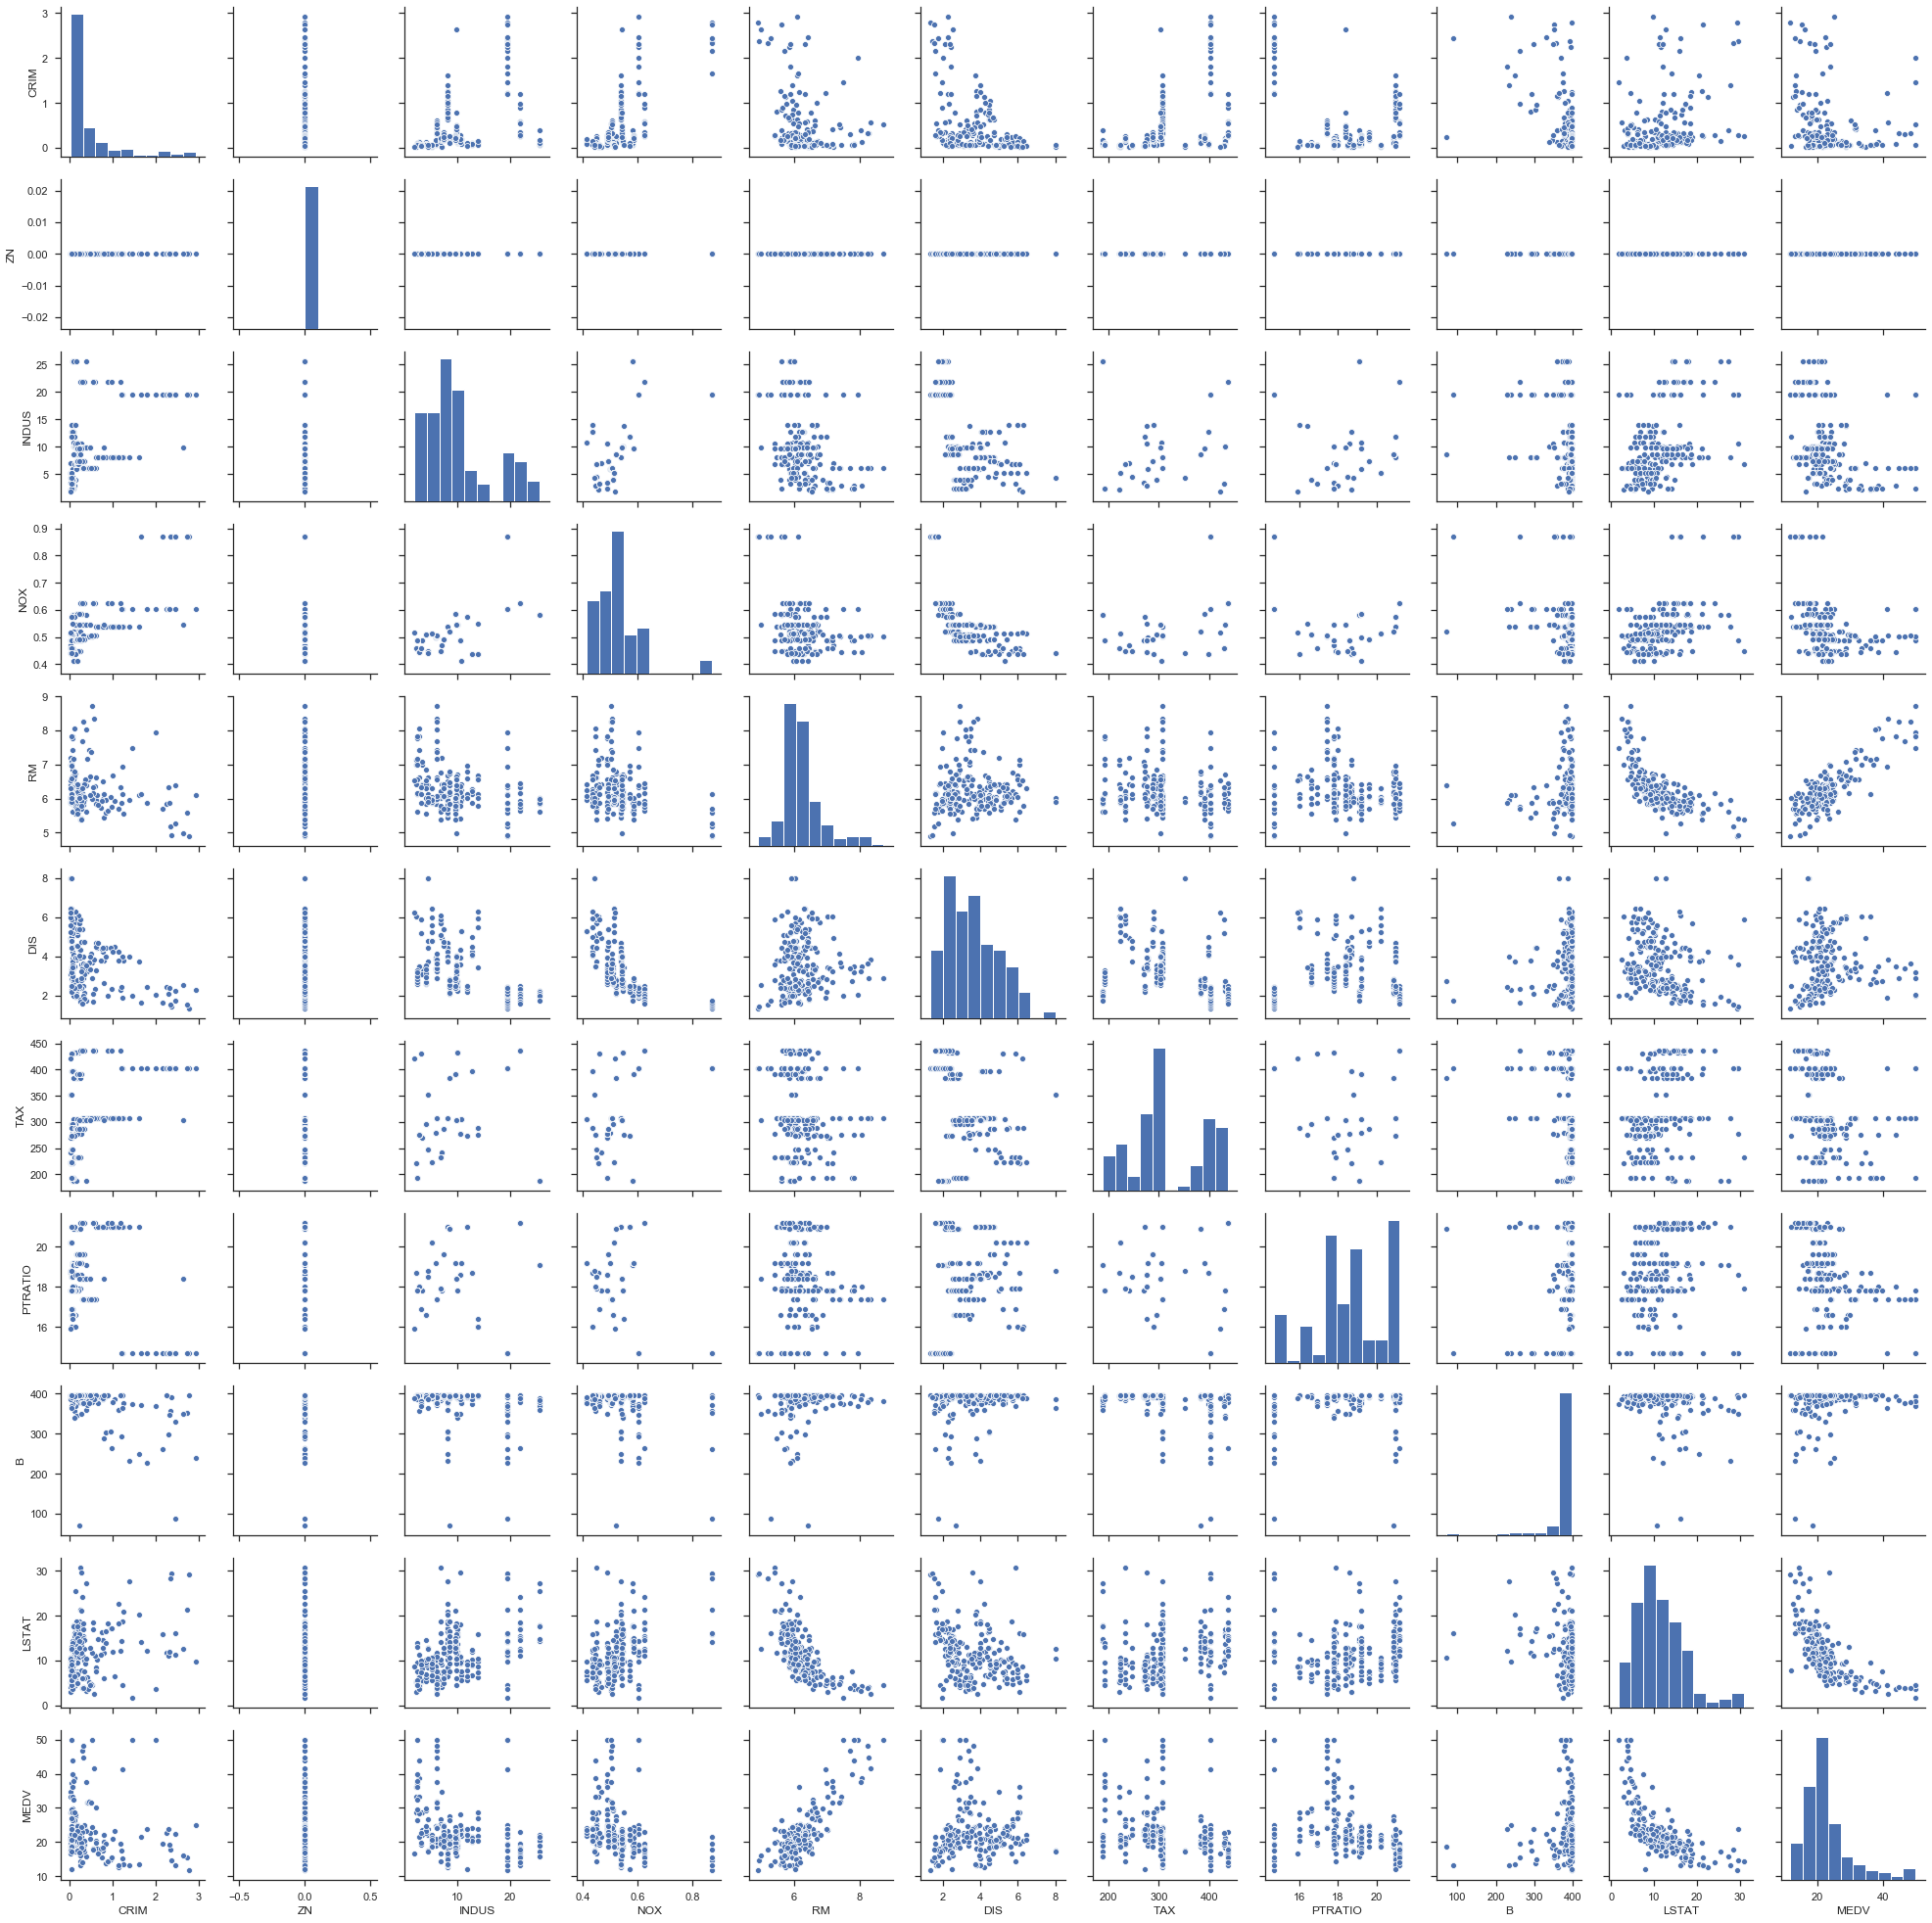

In [84]:
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data = data_zero_less)
plt.show()

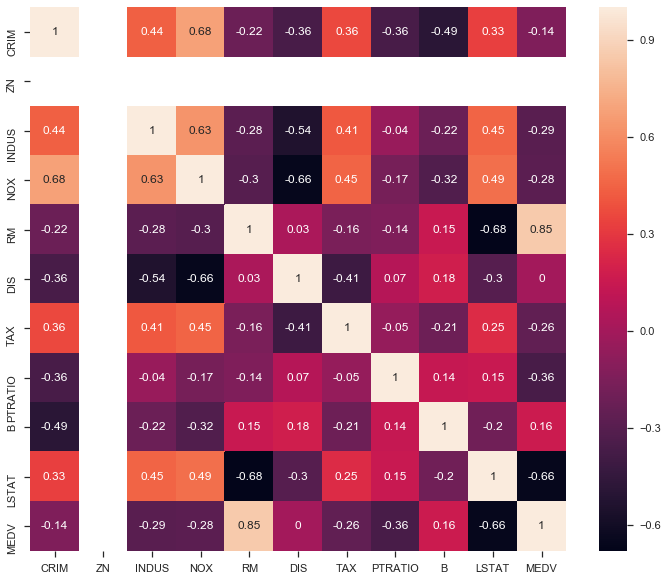

In [85]:
correlation_matrix = data_zero_less.corr().round(2)
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

In [86]:
X = data_zero_less[['LSTAT', 'RM', 'PTRATIO', 'INDUS']]
Y = data_zero_less['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)
model = LinearRegression()
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
mean_absolute_error(Y_pred,y_test)

2.895603138766889

In [87]:
error = 2.9/Y*100
print('Средняя ошибка ', error.mean(),' %')

Средняя ошибка  13.680633121310054  %


In [88]:
model.coef_

array([-0.17440352,  8.99018743, -0.98309907, -0.06023028])

**Далеко от воды с низкими налогами и небольшими участками**

# Построили 4 удовлетворительные модели 
Пришлось разбить на области по признакам
1. "CHAS" = 1 и "MEDV" < 49 (вблизи воды и с нормальной медианной ценой)
2. "CHAS" = 0, "TAX" > 600, "ZN" = 0 (далеко от воды, с высокими налогами, маленькие участки)
3. "CHAS" = 0, "ZN" != 0 (далеко от воды, с большими участками)
4. "CHAS" = 0, "TAX" < 600 (далеко от воды, с низкими налогами, маленькие участки)
Это покрывает почти все варианты. 